In [ ]:
# ..... coexp cons for marker set ..... #
# brain - fetal vs adult MTG

In [2]:
library(dplyr)
library(data.table)
library(ggplot2)
library(viridis)
library(corrplot)
library(matrixStats)

In [3]:
# get heatmap across species x species table for a given gene #
my_palette = viridis::magma(10)

spe = c('human', 'chimp', 'rhesusm', 'crabm', 'mouse', 'rat', 'rabbit', 'boar', 'cow', 'dog', 'horse', 'goat',
         'sheep', 'chicken', 'zebrafish', 'atlanticsalmon', 'rainbowtrout',
         'fruitfly', 'roundworm', 'bee', 'bombyx', 'yeast', 'arabidopsis', 'maize', 'tomato')
spelist = c('human', 'chimp', 'rhesusm', 'crabm', 'mouse', 'rat', 'rabbit', 'boar',
        'sheep', 'goat', 'cow', 'horse', 'dog', 'chicken', 'zebrafish', 'atlanticsalmon', 'rainbowtrout',
        'roundworm', 'fruitfly', 'bee', 'bombyx', 'yeast', 'arabidopsis', 'maize', 'tomato')

bulkspec = read.delim('~/Primate_MTG/bulk_coexp_spec_cross_species_25.csv', sep = ',')
dim(bulkspec)

[1] 14131   301

In [4]:
m1 = read.delim('fetal_meta_markers.csv', sep = ',')
m1[1,]

group cell_type           rank gene  recurrence auroc     fold_change
1 all   Dividing_Progenitor 1    HMGB2 37         0.9196456 12.0989    
  fold_change_detection expression precision ⋯ linnarsson_GW8_point_1
1 2.922189              1763.491   0.3844271 ⋯ TRUE                  
  linnarsson_GW8_point_5_1 linnarsson_GW8_point_5_2 linnarsson_GW9_point_2
1 TRUE                     TRUE                     TRUE                  
  linnarsson_GW9_point_5 linnarsson_GW10 linnarsson_GW11_point_5
1 TRUE                   TRUE            TRUE                   
  linnarsson_GW12 linnarsson_GW13 linnarsson_GW14
1 TRUE            TRUE            TRUE

In [5]:
ctypes = unique(m1$cell_type)
ctypes
dim(m1)

[1] "Dividing_Progenitor"     "GABAergic"              
[3] "Glutamatergic"           "Intermediate_Progenitor"
[5] "Neural_Progenitor"       "Non-neuronal"           
[7] "other"

[1] 118538     50

In [6]:
colids = grep(paste(spe[c(1:15,18,19)], collapse = '|'), colnames(bulkspec))
bulkspec$animal_avg = rowMeans(bulkspec[,colids], na.rm = T)
bulkspec[1,]

gene human_chimp human_rhesusm human_crabm human_mouse human_rat human_rabbit
1 A1BG 0.9171331   0.6754909     0.519668    0.3459922   0.432844  0.5321471   
  human_boar human_cow human_dog ⋯ bombyx_arabidopsis bombyx_maize
1 0.8450163  0.1639923 0.9315495 ⋯ NA                 NA          
  bombyx_tomato yeast_arabidopsis yeast_maize yeast_tomato arabidopsis_maize
1 NA            NA                NA          NA           NA               
  arabidopsis_tomato maize_tomato animal_avg
1 NA                 NA           0.813818

In [7]:
m1$coexp_cons = bulkspec$animal_avg[match(m1$gene, bulkspec$gene)]
m1[1:2,]

group cell_type           rank gene  recurrence auroc     fold_change
1 all   Dividing_Progenitor 1    HMGB2 37         0.9196456 12.09890   
2 all   Dividing_Progenitor 2    SMC4  37         0.8290742  9.54932   
  fold_change_detection expression precision ⋯ linnarsson_GW8_point_5_1
1 2.922189              1763.491   0.3844271 ⋯ TRUE                    
2 4.655425               489.452   0.4906879 ⋯ TRUE                    
  linnarsson_GW8_point_5_2 linnarsson_GW9_point_2 linnarsson_GW9_point_5
1 TRUE                     TRUE                   TRUE                  
2 TRUE                     TRUE                   TRUE                  
  linnarsson_GW10 linnarsson_GW11_point_5 linnarsson_GW12 linnarsson_GW13
1 TRUE            TRUE                    TRUE            TRUE           
2 TRUE            TRUE                    TRUE            TRUE           
  linnarsson_GW14 coexp_cons
1 TRUE            0.9488106 
2 TRUE            0.9822374

In [8]:
dfm = c()
for(ii in 1:length(ctypes)){
    cid = which(m1$cell_type==ctypes[ii] & m1$rank<=120)
    temp = data.frame(cell_type = ctypes[ii], gene = m1$gene[cid], coexp_cons = m1$coexp_cons[cid])
    dfm = rbind(dfm, temp)
}
dfm[1:2,]

cell_type           gene  coexp_cons
1 Dividing_Progenitor HMGB2 0.9488106 
2 Dividing_Progenitor SMC4  0.9822374

Warning message:
“Removed 110 rows containing non-finite values (`stat_boxplot()`).”


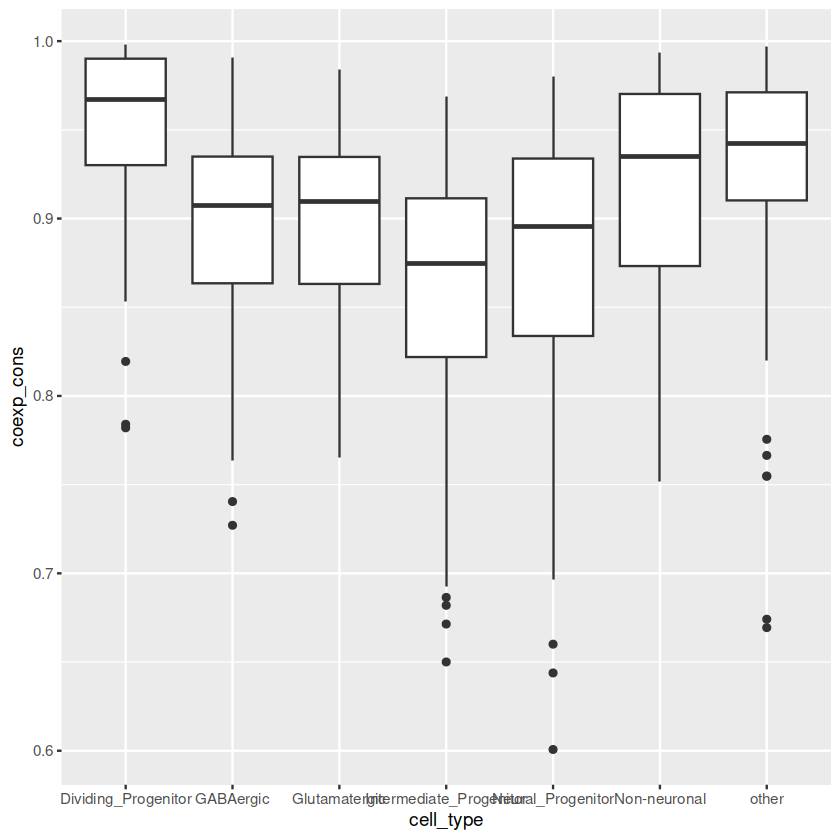

In [9]:
dfm$cell_type = as.factor(dfm$cell_type)
ggplot(dfm, aes(x = cell_type, y = coexp_cons)) + geom_boxplot()

In [10]:
# get mtg marker scores and AnimalTF DB scores too, seidman lab list

In [11]:
# MTG class marlers
tab1 = fread('~/Primate_MTG/markers/markers_human_orthologs_nbd_new.csv.gz')
tab1$rank = rep(1:14131, 3)
tab1[1:2,]

group cell_type gene  fold_change auroc     log_fdr   population_size
1 all   gaba      GRIP1  9.308221   0.9754187 -43795.33 45603          
2 all   gaba      GAD1  48.295389   0.9731368 -43376.12 45603          
  population_fraction average_expression se_expression detection_rate
1 0.2917938           3879.2358          10.053442     0.9997807     
2 0.2917938            531.7395           1.879092     0.9608140     
  fold_change_detection precision recall    rank
1 1.144542              0.3204861 0.9997807 1   
2 9.021895              0.7894064 0.9608140 2

In [12]:
tab1$coexp_cons = bulkspec$animal_avg[match(tab1$gene, bulkspec$gene)]

In [13]:
ctypes2 = unique(tab1$cell_type)
dfmtg = c()
for(ii in 1:length(ctypes2)){
    cid = which(tab1$cell_type==ctypes2[ii] & tab1$rank<=120)
    temp = data.frame(cell_type = ctypes2[ii], gene = tab1$gene[cid], coexp_cons = tab1$coexp_cons[cid])
    dfmtg = rbind(dfmtg, temp)
}
dfmtg[1:2,]

cell_type gene  coexp_cons
1 gaba      GRIP1 0.8513622 
2 gaba      GAD1  0.8808480

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


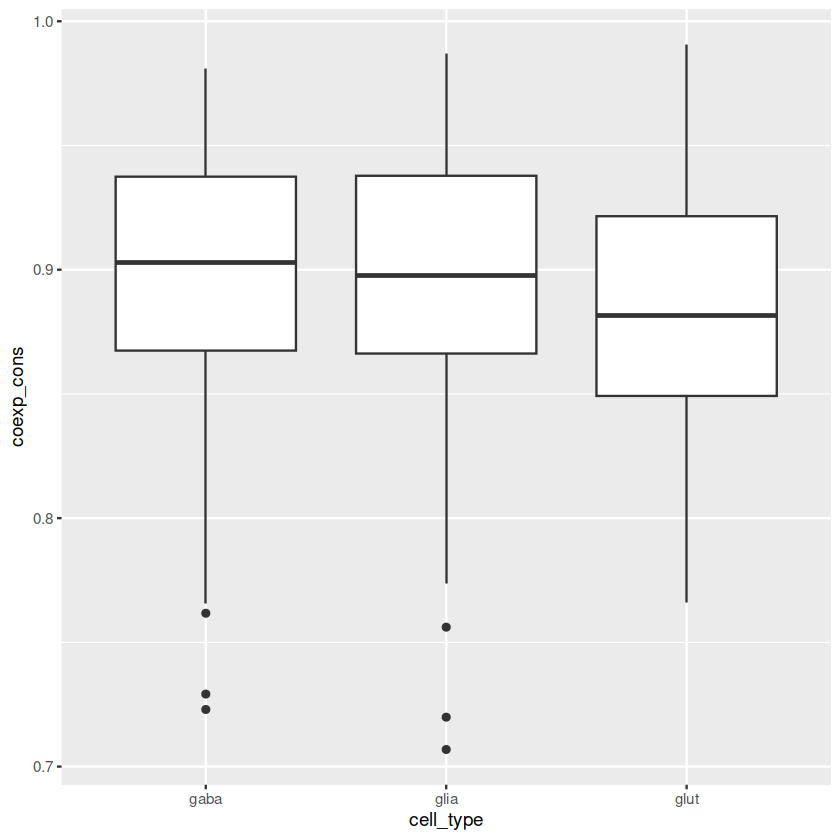

In [14]:
dfmtg$cell_type = as.factor(dfmtg$cell_type)
ggplot(dfmtg, aes(x = cell_type, y = coexp_cons)) + geom_boxplot()

Warning message:
“Removed 112 rows containing non-finite values (`stat_boxplot()`).”


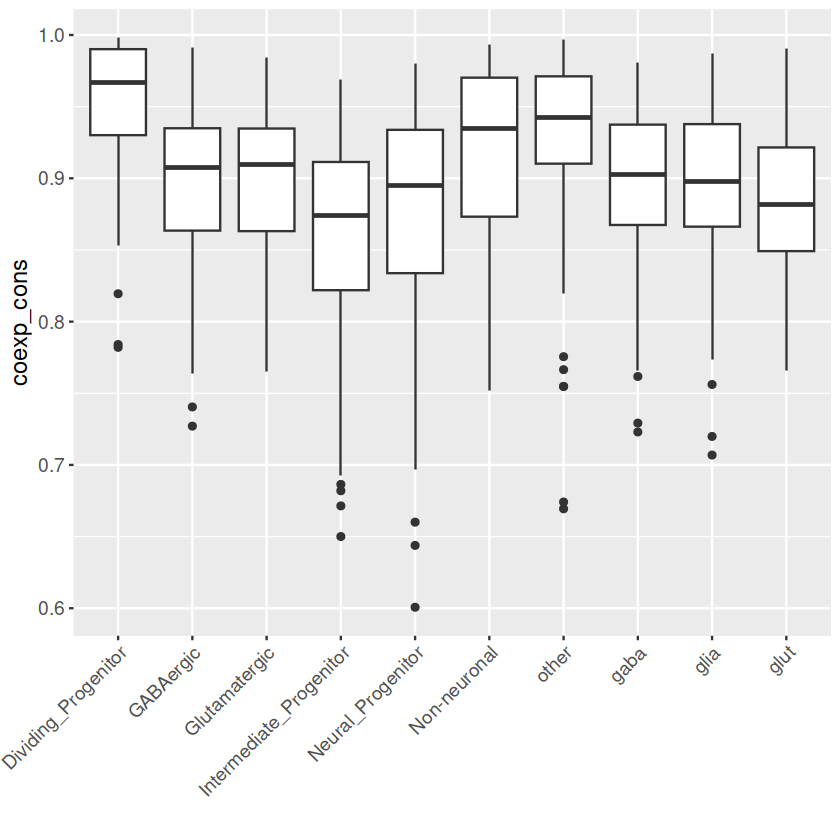

In [15]:
df = rbind(dfm, dfmtg)
df$cell_type = as.factor(df$cell_type)
# png('aa1.png', width = 10, height = 10, res = 300, units = 'in')
ggplot(df, aes(x = cell_type, y = coexp_cons)) + geom_boxplot() +
theme(text = element_text(size=14), axis.text.x = element_text(angle=45, hjust=1)) + xlab('')
# dev.off()

In [16]:
# stratify by gene exp
exps = read.delim('~/Primate_MTG/SVA-brain/GTEx_tissue_exp.csv', sep = ',', row.names = NULL)
ginfo = read.delim('/data/CoCoCoNet/geneInfo/human_info.csv', sep = ',')
exps$gene = ginfo$GeneSymbol[match(exps$row.names, ginfo$NetworkIDs)]
exps <- exps[!is.na(exps$gene),]
exps[1:2,]

row.names       lung       thyroid    heart      adipose    adrenal_gland
1 ENSG00000223972 0.39965398 0.39050536 0.59027778 0.27903469 0.61627907   
3 ENSG00000278267 0.03633218 0.05359877 0.03472222 0.04072398 0.03488372   
  artery     bladder   cerebellum brain_cortex ⋯ prostate   skin      
1 0.24537037 0.2857143 0.70954357 0.65882353   ⋯ 0.46122449 0.35520685
3 0.02083333 0.0000000 0.04149378 0.02745098   ⋯ 0.06530612 0.05563481
  small_intestine spleen     stomach    testis      uterus     vagina    
1 0.50802139      0.69709544 0.34261838 10.34903047 0.43661972 0.39743590
3 0.02139037      0.05394191 0.05571031  0.05540166 0.04929577 0.03205128
  blood      gene     
1 1.25298013 DDX11L1  
3 0.03708609 MIR6859-1

In [17]:
# get tissue-spec scores
compute_tau <- function(data) {
  tau = (rowSums(1 - t(apply(data,1,function(x) x/max(x)))))/(dim(data)[2]-1)
  return(tau)
}                            

In [18]:
# get exp mean + var across tissue 
exps$mean_exp = rowMeans(as.matrix(exps[,2:31]), na.rm = T)
exps$var_exp = rowVars(as.matrix(exps[,2:31]), na.rm = T)
exps$cv = exps$mean_exp/sqrt(exps$var_exp)
exps$tau = compute_tau(as.matrix(exps[,2:31]))

df$mean_exp <- exps$mean_exp[match(df$gene, exps$gene)]
df$var_exp <- exps$var_exp[match(df$gene, exps$gene)]
df$cv <- exps$cv[match(df$gene, exps$gene)]
df$tau <- exps$tau[match(df$gene, exps$gene)]
df[1:3,]

cell_type           gene  coexp_cons mean_exp  var_exp cv       tau      
1 Dividing_Progenitor HMGB2 0.9488106  3729.4664 5159821 1.641835 0.6388446
2 Dividing_Progenitor SMC4  0.9822374  1248.4215 1228453 1.126372 0.7932192
3 Dividing_Progenitor TOP2A 0.9871555   903.3354 4877536 0.409024 0.9557965

In [19]:
ctypes

[1] "Dividing_Progenitor"     "GABAergic"              
[3] "Glutamatergic"           "Intermediate_Progenitor"
[5] "Neural_Progenitor"       "Non-neuronal"           
[7] "other"

In [20]:
# 100 to 120 markers in each cell type - subset to 100 everywhere
df2 = df[!is.na(df$coexp_cons) & !is.na(df$mean_exp),]
ctypes = unique(df2$cell_type)
df3 = c()

for(ii in 1:length(ctypes)){
    temp = df2[df2$cell_type==ctypes[ii],]
    df3 = rbind(df3, temp[1:100,])
}
df3$cell_type = factor(df3$cell_type, 
                       levels = c('Dividing_Progenitor', 'Neural_Progenitor', 'Intermediate_Progenitor',
                                  'GABAergic', 'Glutamatergic', 'Non-neuronal', 'other', 'gaba', 'glia', 'glut'))
df3$final_type = 'fetal'
df3$final_type[df3$cell_type %in% c('glia', 'gaba', 'glut')] = 'adult'
dim(df3)

[1] 1000    8

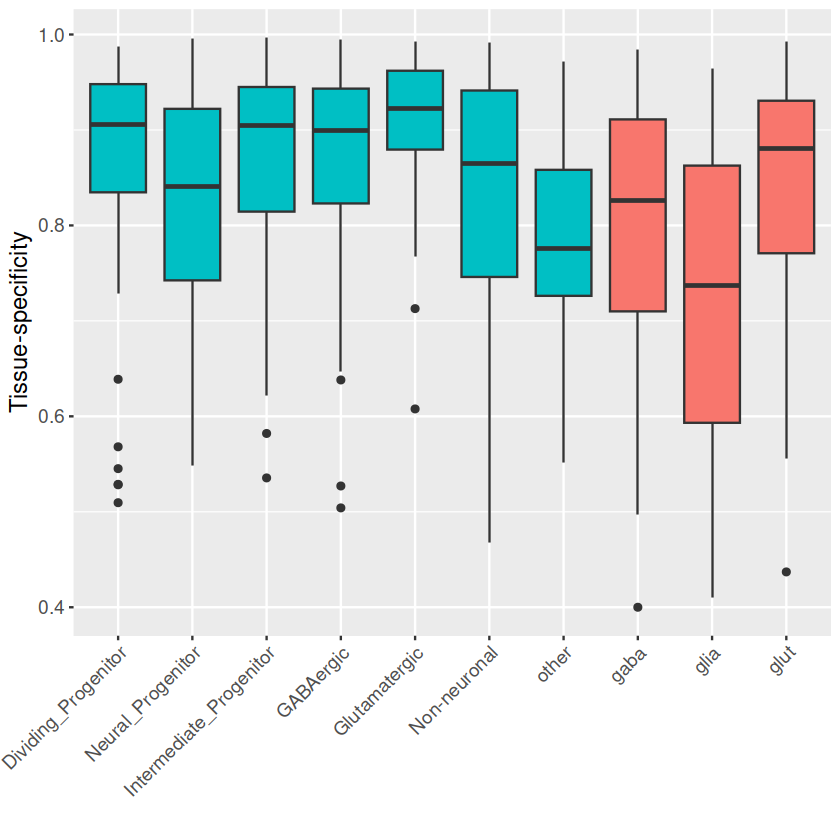

In [21]:
# png('aa4.png', width = 10, height = 10, res = 300, units = 'in')
ggplot(df3, aes(x = cell_type, y = tau, fill = final_type)) + geom_boxplot() +
theme(text = element_text(size=14), axis.text.x = element_text(angle=45, hjust=1)) + xlab('') +
theme(legend.position = 'none') + ylab('Tissue-specificity')
# dev.off()

In [56]:
# expr across tissues for markers for select cell types
currtype = 'Neural_Progenitor'
glist = df3$gene[df3$cell_type==currtype]
mat2 = as.matrix(exps[match(glist, exps$gene), 2:31])
rownames(mat2) = glist
dfmat = data.frame(tissue = rep(colnames(mat2), each = 100), exp = as.vector(mat2))
dfmat$tissue_type = 'other'
dfmat$tissue_type[dfmat$tissue %in% c('brain_cortex', 'cerebellum', 'hippocampus', 'hypothalamus')] = 'brain'
dfmat$tissue = as.factor(dfmat$tissue)
dfmat[1:3,]

tissue exp      tissue_type
1 lung     22.891 other      
2 lung   3676.398 other      
3 lung   6753.775 other

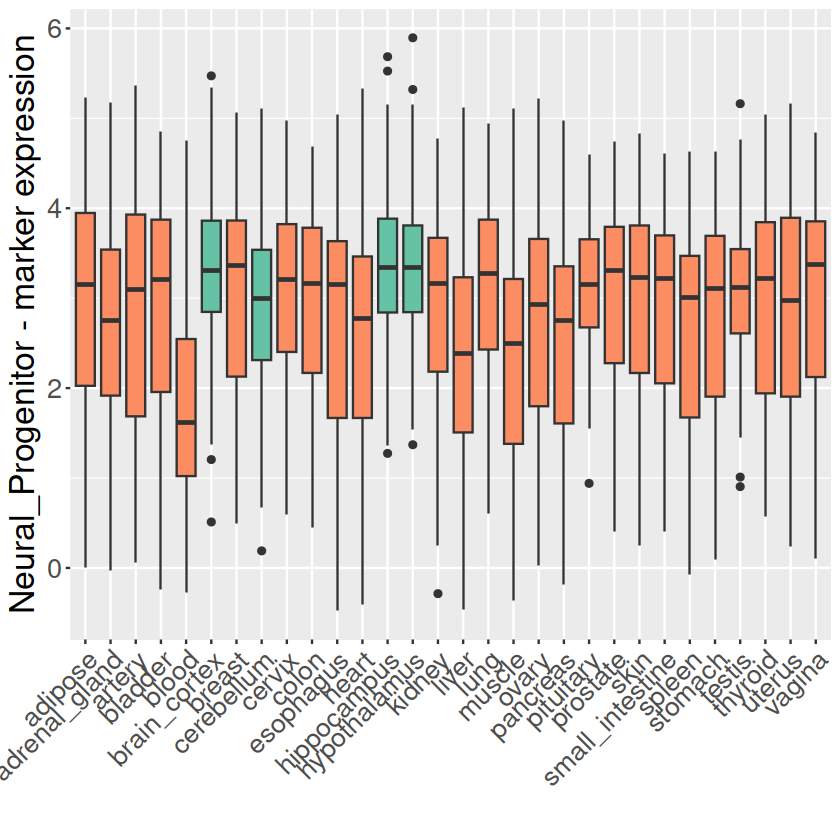

In [58]:
# png('aa-neural.png', width = 10, height = 10, res = 300, units = 'in')
ggplot(dfmat, aes(x = tissue, y = log10(exp), fill = tissue_type)) + geom_boxplot() +
scale_fill_brewer(palette="Set2") +
theme(text = element_text(size=20), axis.text.x = element_text(angle=45, hjust=1)) + xlab('') +
theme(legend.position = 'none') + ylab(paste0(currtype, ' - marker expression'))
# dev.off()

In [ ]:
# ..... AnimalTFDB v4 ..... #

In [51]:
tf1 = read.delim('Homo_sapiens_TF.txt', sep = '\t')
tf1$tf_type = 'TF'

tf2 = read.delim('Homo_sapiens_Cof.txt', sep = '\t')
tf2$tf_type = 'TF_Cofactor'

collist = c('Species', 'Symbol', 'Ensembl', 'Family', 'tf_type')
tft = rbind(tf1[,collist], tf2[,collist])
tft[1,]

Species      Symbol Ensembl         Family  tf_type
1 Homo_sapiens ATF1   ENSG00000123268 TF_bZIP TF

In [52]:
tft$coexp_cons = bulkspec$animal_avg[match(tft$Symbol, bulkspec$gene)]
tft[1,]

Species      Symbol Ensembl         Family  tf_type coexp_cons
1 Homo_sapiens ATF1   ENSG00000123268 TF_bZIP TF      0.8226184

In [62]:
tft$cell_type = tft$tf_type
tft$gene = tft$Symbol
dfnew = rbind(df, tft[,c('cell_type', 'gene', 'coexp_cons')])

Warning message:
“Removed 715 rows containing non-finite values (`stat_boxplot()`).”


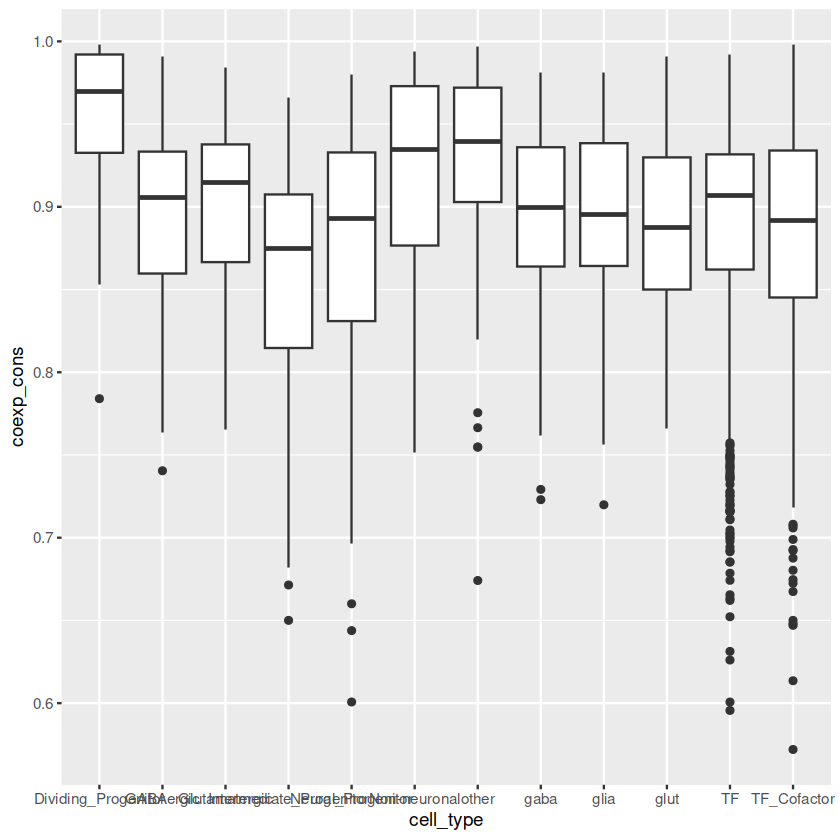

In [63]:
dfnew$cell_type = as.factor(dfnew$cell_type)
ggplot(dfnew, aes(cell_type, coexp_cons)) + geom_boxplot()